In [1]:
"""
 Created by quentincangelosi at 22.09.20
 From Global Advanced Analytics and Artificial Intelligence
"""
import numpy as np
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sb
import glob
import json
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)         # initiate notebook for offline plot

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sb.set()
sb.set_style("darkgrid", {"axes.facecolor": ".9"})
sb.despine()
sb.set_context("talk")
#pandas.options.display.float_format = '{:,.2f}'.format

In [2]:
config_files = glob.glob("./results/MultiAgents_*/*.json")
configs = []
for conf_file in config_files:
    try:
        with open(conf_file, "rb") as f:
            configs.append(json.load(f))
        
#        print(f"Uploaded {conf_file}")

    except:
        print(f"Failed Uploading {conf_file}")
        continue
print(f"Uploaded {len(configs)} configs")
df = pd.DataFrame(configs)
df["start_time"] = pd.to_datetime(df["start_time"])
df.loc[df["start_time"].isnull(), "start_time"] = pd.Timestamp(2020,11,5).tz_localize("UTC") # Before I started adding this flag
df = df.sort_values("start_time").reset_index(drop=True)
df

Failed Uploading ./results/MultiAgents_DDPG_1605438427163399000/config.json
Uploaded 18 configs


,BATCH_SIZE,BUFFER_SIZE,GAMMA,LR_ACTOR,LR_CRITIC,TAU,UPDATE_EVERY,WEIGHT_DECAY,action_noise,action_noise_scale,action_size,agent,avg_eval_score,avg_training_score,best_eval_score,best_training_score,current_episode,elapsed_time,env_name,eps_decay,eval_scores,evaluate_every,func_actor_body,func_critic_body,func_critic_head,hidden_layers_actor,hidden_layers_critic_body,hidden_layers_critic_head,last_50_score,length_episode,lr_scheduler,mode,n_agents,n_episodes,random_seed,save_every,save_path,start_time,state_normalizer,state_size,threshold,training_scores,warmup,weights_noise
0,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,0.000000,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100.0,7.660748,Reacher,1.000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",50,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.000000,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605430590957637000,2020-11-15 08:56:30.958045+00:00,None,33,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,None
1,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,0.000000,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",200.0,14.507758,Reacher,1.000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",50,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.000000,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605430650720052000,2020-11-15 08:57:30.720401+00:00,None,33,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,None
2,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,0.650375,0.757305,0.7755,0.9785,200.0,5821.583451,Reacher,1.000,"[[0.8099999818950891, 0.0, 0.4399999901652336,...",50,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.750110,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605442569650712000,2020-11-15 12:16:09.651078+00:00,None,33,NaN,"[[0.2199999950826168, 2.43999994546175, 1.3499...",0,None
3,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,0.725282,NaN,1.06,220.0,6020.797447,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.724309,1500,None,train,20,500,NaN,10,./results/MultiAgents_DDPG_1605453272700545000,2020-11-15 15:14:32.700941+00:00,None,33,NaN,"[[0.0, 0.8899999801069498, 1.029999976977706, ...",0,None
4,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,0.724125,NaN,1.051,100.0,2495.856009,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.714760,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605465003072615000,2020-11-15 18:30:03.074209+00:00,None,33,NaN,"[[1.2599999718368053, 0.909999979659915, 0.789...",0,None
5,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,30.056281,NaN,37.867,500.0,15500.292884,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],29.480373,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605471672473682000,2020-11-15 20:21:12.474050+00:00,None,33,NaN,"[[0.3199999928474426, 0.5199999883770943, 0.38...",0,None
6,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,32.575888,NaN,37.88,NaN,17923.536385,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],32.230839,1500,None,train,20,500,42.0,100,./results/MultiAgents_DDPG_1605519028562531000,2020-11-16 09:30:28.562807+00:00,None,33,NaN,"[[0.5199999883770943, 0.17999999597668648, 0.9...",0,None
7,128,1000000,0.99,0.0001,0.0001,0.001,1,0.000,OU,1,4,DDPG,NaN,3.921620,NaN,8.1755,NaN,13384.169335,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[50, 30, 15]","[50, 30]","[30, 15]",4.024819,1500,None,train,20,500,42.0,100,./results/MultiAgents_DDPG_1605520515875364000,2020-11-16 09:55:15.876644+00:00,None,33,NaN,"[[1.149999974295497, 0.3999999910593033, 1.119...",0,None
8,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,8.915093,NaN,19.2395,NaN,12223.600796,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[50, 50, 15]","[50, 50]",[50],8.856

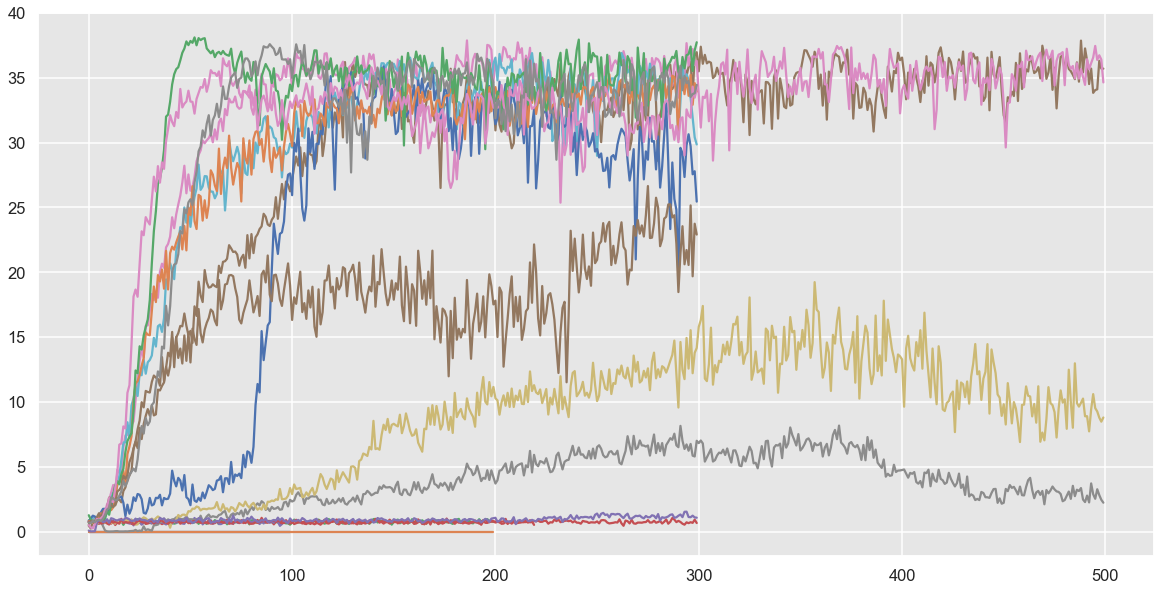

In [3]:
plt.figure(figsize=(20, 10))
for i, row in df.iterrows():
    scores = np.array(row["training_scores"])
    if len(scores.shape) > 1: 
        scores = np.mean(scores, axis=1)
    plt.plot(scores, label=i)
#plt.legend()
plt.show()

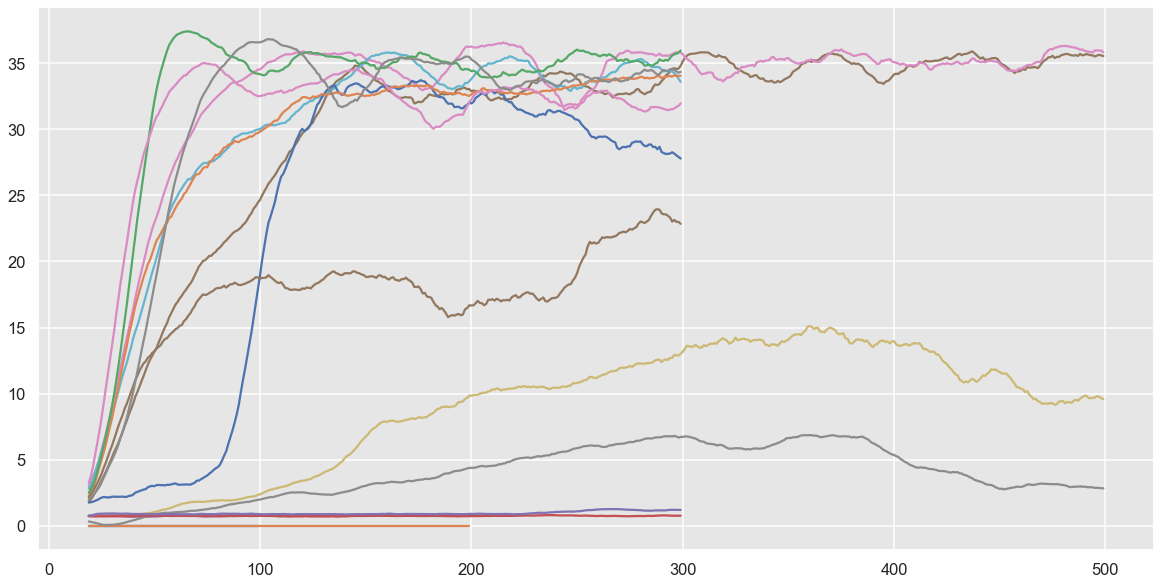

In [4]:
plt.figure(figsize=(20, 10))
for i, row in df.iterrows():
    scores = np.array(row["training_scores"])
    scores = np.mean(scores, axis=1)
    plt.plot(pd.Series(scores).rolling(20).mean())
plt.show()

In [5]:
# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

for i, row in df.iterrows():
    if type(row["training_scores"]) is list:
        scores = np.array(row["training_scores"])
        scores = np.mean(scores, axis=1)
        x = list(range(len(scores)))
        y = list(pd.Series(scores).rolling(20).mean())
        name = f"{row['BATCH_SIZE']}_{row['GAMMA']}_{row['WEIGHT_DECAY']}"
        name = i
        fig.add_trace(
            go.Scatter(x=x, y=y,
                       name=name,), row=1, col=1) #line=dict(shape='hv'))

fig.update_yaxes(title_text="Scores", row=1, col=1, title_font=dict(size=8, family='Courier', color='crimson'))


# Set title
fig.update_layout(
    title="Scores Comparison",
    height=500,
    width=1000,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
)

fig.show()

## Last 10 results

In [6]:
# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

for i, row in df.tail(5).iterrows():
    if type(row["training_scores"]) is list:
        scores = np.array(row["training_scores"])
        scores = np.mean(scores, axis=1)
        x = list(range(len(scores)))
        y = list(pd.Series(scores).rolling(20).mean())
        name = f"{row['BATCH_SIZE']}_{row['GAMMA']}_{row['WEIGHT_DECAY']}"
        name = i
        fig.add_trace(
            go.Scatter(x=x, y=y,
                       name=name,), row=1, col=1) #line=dict(shape='hv'))

fig.update_yaxes(title_text="Scores", row=1, col=1, title_font=dict(size=8, family='Courier', color='crimson'))


# Set title
fig.update_layout(
    title="Scores Comparison",
    height=500,
    width=1000,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
)

fig.show()

In [13]:
selected_indexes = [5, 6, #7, 
                    9, 10, 11,
                   12, 13, 14, 15, 16, 17
                   ]
names = {5: "baseline",
         6: "baseline 2",
         9: "baseline 3",
         7: "(50,30,15)/(50, 30)(30, 15), LR1e-4",
         10: "gamma=0.8",
         11: "multistep LR sched.",
         12: "leaky_relu",
         13: "weightdecay=0.001",
         16: "NormalNoise",
         17: "BatchNorm",
         14: "hiddenlayers=(256,128)",
         15: "eps-decay=0.995"
        }
# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

for i, row in df.loc[selected_indexes, :].iterrows():
    if type(row["training_scores"]) is list:
        scores = np.array(row["training_scores"])
        scores = np.mean(scores, axis=1)
        x = list(range(len(scores)))
        y = list(pd.Series(scores))
        y2 = list(pd.Series(scores).rolling(20).mean())
        y3 = list(pd.Series(scores).rolling(100).mean())

        name = names[i]
        name2 = name#+ " RM20"
#        name3 = "Rolling mean (sz=100)"
        #fig.add_trace(
        #    go.Scatter(x=x, y=y,
        #               name=name,), row=1, col=1) #line=dict(shape='hv'))

        fig.add_trace(
            go.Scatter(x=x, y=y2,
                       name=name2,), row=1, col=1) #line=dict(shape='hv'))

#        fig.add_trace(
#            go.Scatter(x=x, y=y3,
#                       name=name3,), row=1, col=1) #line=dict(shape='hv'))

x = list(range(500))
threshold = [30,] * 500
fig.add_trace(
    go.Scatter(x=x, y=threshold,
               name="Threshold: 30", line_color="black"), row=1, col=1) #line=dict(shape='hv'))

fig.update_yaxes(title_text="Scores", row=1, col=1, title_font=dict(size=16, family='Courier'))
fig.update_xaxes(title_text="Episodes", row=1, col=1, title_font=dict(size=16, family='Courier'))


# Set title
fig.update_layout(
    title="Scores Comparison",
    height=500,
    width=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
)

fig.show()

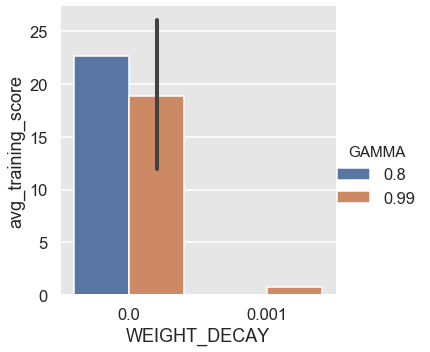

In [8]:
sb.catplot(y="avg_training_score", data=df.tail(15), x="WEIGHT_DECAY", kind="bar", hue="GAMMA")

In [9]:
df

,BATCH_SIZE,BUFFER_SIZE,GAMMA,LR_ACTOR,LR_CRITIC,TAU,UPDATE_EVERY,WEIGHT_DECAY,action_noise,action_noise_scale,action_size,agent,avg_eval_score,avg_training_score,best_eval_score,best_training_score,current_episode,elapsed_time,env_name,eps_decay,eval_scores,evaluate_every,func_actor_body,func_critic_body,func_critic_head,hidden_layers_actor,hidden_layers_critic_body,hidden_layers_critic_head,last_50_score,length_episode,lr_scheduler,mode,n_agents,n_episodes,random_seed,save_every,save_path,start_time,state_normalizer,state_size,threshold,training_scores,warmup,weights_noise
0,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,0.000000,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",100.0,7.660748,Reacher,1.000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",50,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.000000,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605430590957637000,2020-11-15 08:56:30.958045+00:00,None,33,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,None
1,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,0.000000,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",200.0,14.507758,Reacher,1.000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",50,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.000000,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605430650720052000,2020-11-15 08:57:30.720401+00:00,None,33,NaN,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,None
2,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,0.650375,0.757305,0.7755,0.9785,200.0,5821.583451,Reacher,1.000,"[[0.8099999818950891, 0.0, 0.4399999901652336,...",50,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.750110,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605442569650712000,2020-11-15 12:16:09.651078+00:00,None,33,NaN,"[[0.2199999950826168, 2.43999994546175, 1.3499...",0,None
3,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,0.725282,NaN,1.06,220.0,6020.797447,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.724309,1500,None,train,20,500,NaN,10,./results/MultiAgents_DDPG_1605453272700545000,2020-11-15 15:14:32.700941+00:00,None,33,NaN,"[[0.0, 0.8899999801069498, 1.029999976977706, ...",0,None
4,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,0.724125,NaN,1.051,100.0,2495.856009,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],0.714760,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605465003072615000,2020-11-15 18:30:03.074209+00:00,None,33,NaN,"[[1.2599999718368053, 0.909999979659915, 0.789...",0,None
5,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,30.056281,NaN,37.867,500.0,15500.292884,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],29.480373,1500,None,train,20,500,NaN,100,./results/MultiAgents_DDPG_1605471672473682000,2020-11-15 20:21:12.474050+00:00,None,33,NaN,"[[0.3199999928474426, 0.5199999883770943, 0.38...",0,None
6,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,32.575888,NaN,37.88,NaN,17923.536385,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[200, 150]",[400],[300],32.230839,1500,None,train,20,500,42.0,100,./results/MultiAgents_DDPG_1605519028562531000,2020-11-16 09:30:28.562807+00:00,None,33,NaN,"[[0.5199999883770943, 0.17999999597668648, 0.9...",0,None
7,128,1000000,0.99,0.0001,0.0001,0.001,1,0.000,OU,1,4,DDPG,NaN,3.921620,NaN,8.1755,NaN,13384.169335,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[50, 30, 15]","[50, 30]","[30, 15]",4.024819,1500,None,train,20,500,42.0,100,./results/MultiAgents_DDPG_1605520515875364000,2020-11-16 09:55:15.876644+00:00,None,33,NaN,"[[1.149999974295497, 0.3999999910593033, 1.119...",0,None
8,128,1000000,0.99,0.0010,0.0010,0.001,1,0.000,OU,1,4,DDPG,NaN,8.915093,NaN,19.2395,NaN,12223.600796,Reacher,1.000,NaN,5000,F.relu,F.relu,F.relu,"[50, 50, 15]","[50, 50]",[50],8.856

In [10]:
selected_indexes = [5, 6]
names = {5: "baseline",
        }
# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

for i, row in df.loc[[5,], :].iterrows():
    if type(row["training_scores"]) is list:
        scores = np.array(row["training_scores"])
        scores = np.mean(scores, axis=1)
        x = list(range(len(scores)))
        y = list(pd.Series(scores))
        y2 = list(pd.Series(scores).rolling(20).mean())
        y3 = list(pd.Series(scores).rolling(100).mean())
        threshold = [30,] * len(x)
        name = f"{row['BATCH_SIZE']}_{row['GAMMA']}_{row['WEIGHT_DECAY']}"
        name = "Scores"
        name2 = "Rolling mean (sz=20)"
        name3 = "Rolling mean (sz=100)"
        fig.add_trace(
            go.Scatter(x=x, y=y,
                       name=name,), row=1, col=1) #line=dict(shape='hv'))

        fig.add_trace(
            go.Scatter(x=x, y=y2,
                       name=name2,), row=1, col=1) #line=dict(shape='hv'))

        fig.add_trace(
            go.Scatter(x=x, y=y3,
                       name=name3,), row=1, col=1) #line=dict(shape='hv'))

        fig.add_trace(
            go.Scatter(x=x, y=threshold,
                       name="Threshold: 30",), row=1, col=1) #line=dict(shape='hv'))

fig.update_yaxes(title_text="Scores", row=1, col=1, title_font=dict(size=16, family='Courier'))
fig.update_xaxes(title_text="Episodes", row=1, col=1, title_font=dict(size=16, family='Courier'))


# Set title
fig.update_layout(
    title="Scores Comparison",
    height=500,
    width=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1)
)

fig.show()